
# Proyecto 1: Regresión Lineal Simple

## Introducción
Este proyecto tiene como objetivo implementar un modelo de regresión lineal simple para predecir las ganancias de un food truck en diferentes ciudades. Se proporcionan datos de población y ganancias de ciudades existentes, y se busca ajustar una recta que mejor describa la relación entre estas dos variables.

La regresión lineal es una técnica de aprendizaje supervisado utilizada para modelar la relación entre una variable dependiente (en este caso, las ganancias) y una variable independiente (la población).

El archivo de datos proporcionado contiene dos columnas: la primera representa la población en decenas de miles, y la segunda representa las ganancias en miles de dólares.

El objetivo es implementar una serie de funciones que nos permitan calcular los parámetros de la recta que mejor ajusta los datos, así como predecir las ganancias en función de la población de una ciudad.



## Objetivos

- Implementar un modelo de regresión lineal simple utilizando Python
- Calcular los parámetros de la recta que mejor ajusta los datos (Theta)
- Utilizar el modelo para realizar predicciones basadas en nuevas entradas
- Graficar los datos junto con la recta de regresión obtenida

A continuación, se presenta la siguiente paso a paso del código realizado para llegar al objetivo principar.

## Desarrollo

### 1. Importación de bibliotecas

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Se importan tres bibliotecas fundamentales:

- `pandas`: Para manipulación y análisis de datos estructurados (DataFrames)

- `numpy`: Para realizar operaciones numéricas, especialmente con arrays

- `matplotlib.pyplot`: Para crear gráficos y visualizar los datos

### 2. Cargar y Preparar los Datos

In [10]:
# Cargar los datos desde el archivo .txt
data = pd.read_csv('/Users/maxgallardo/Documents/TEC/Semestres/Semestre 7/TC3006C/AI-DS/P1/Proyecto 1 Simple Linear Regression Data.txt', header=None, names=['Population', 'Profit'])

# Separar los datos en X y Y
x = data['Population'].values.reshape(-1, 1)
y = data['Profit'].values.reshape(-1, 1)

# Agregar una columna de 1s para el vector de intersección (bias)
m = len(y)
x = np.c_[np.ones(m), x]

- **Cargar Datos:** Se cargan los datos desde un archivo CSV utilizando `pandas`. La función `read_csv` lee el archivo y lo convierte en un DataFrame, donde las columnas se nombran como `Population` (población) y `Profit` (ganancias)

- **Extraer Variables:**
    - `x` extrae los valores de la columna `Population` y los convierte en un array de NumPy con la forma (m, 1), donde m es el número de ejemplos
    
    - `y` extrae los valores de la columna `Profit` y los convierte en un array de NumPy con la forma (m, 1)

- **Agregar Columna de Unos:**
    - `x = np.c_[np.ones(m), x]` agrega una columna de unos al array `x`. Esto es necesario para representar el término de intercepto $\theta_0$ en la regresión lineal, que corresponde al coeficiente de la columna de unos

### 3. Función para graficar los datos

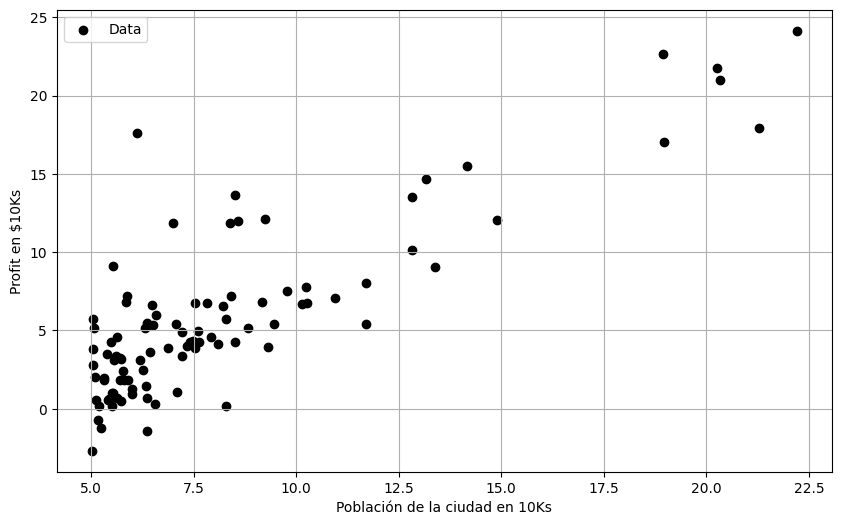

In [11]:
# Definir la función para graficar los datos y la recta de regresión
def graficaDatos(x, y, theta=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='black', marker='o', label='Data')
    plt.xlabel('Población de la ciudad en 10Ks')
    plt.ylabel('Profit en $10Ks')
    
    if theta is not None:
        plt.plot(x, np.dot(np.c_[np.ones(x.shape[0]), x], theta), label='Regresión lineal', color='red')
    
    plt.legend()
    plt.grid(True)
    plt.show()

graficaDatos(x[:, 1], y)

- **Inicializar Gráfico:** Se crea una nueva figura de tamaño $10 \times 6$

- **Graficar Puntos:** `plt.scatter(x, y, ...)` grafica los puntos de los datos de entrenamiento (población vs. ganancias)

- **Graficar Recta de Regresión:** Si se proporciona un valor para `theta`, se calcula y grafica la recta de regresión sobre los puntos de datos

- **Personalizar y Mostrar:** Se agregan etiquetas de los ejes, una leyenda, y se muestra el gráfico


### 4. Función para calcular el costo (Función de error)

In [12]:
# Definir la función de coste
def calculaCosto(x, y, theta):
    m = len(y)
    J = np.sum((np.dot(x, theta) - y) ** 2) / (2 * m)
    return J

# Calcular costo inicial
initial_cost = calculaCosto(x, y, theta=np.zeros((2, 1)))
initial_cost

32.072733877455676

- **Calcular el Error Cuadrático Medio:**
    - La función calcula la función de costo $J(\theta)$, que mide el error cuadrático medio entre las predicciones del modelo y los valores reales de las ganancias
    - Se utiliza la fórmula $J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x_i) - y_i)^2$, donde $h_{\theta}(x_i)$ es la predicción del modelo para el ejemplo $i$

### 5. Función de descenso por gradiente

In [13]:
# Definir la función de gradiente descendente
def gradienteDescendente(X, y, theta, alpha, iteraciones):
    m = len(y)
    J_history = []
    
    for i in range(iteraciones):
        theta = theta - (alpha / m) * np.dot(X.T, (np.dot(X, theta) - y))
        J_history.append(calculaCosto(x, y, theta))
    
    return theta, J_history

- **Inicializar Parámetros:**
    - `m` es el número de ejemplos
    - `J_history` es una lista para almacenar los valores del costo durante cada iteración, lo que permite monitorear la convergencia

- Ciclo de Iteraciones:
    * El algoritmo de descenso por gradiente se ejecuta durante un número fijo de iteraciones.

    * En cada iteración, los parámetros $\theta$ se actualizan utilizando la regla de actualización del gradiente:

        $\theta = \theta - \frac{\alpha}{m} \sum_{i=1}^m \left(h_{\theta}(x_i) - y_i\right) x_i$

* **Registrar Costo**:

    * Después de cada actualización, el costo $J(\theta)$ se calcula y se guarda en `J_history`.

* **Devolver Resultados**:

    * Al final, la función devuelve los valores finales de `theta` y el historial de costos.


### 6. Ejecutar el modelo

In [14]:
# Ejecutar descenso por gradiente
alpha = 0.01
iteraciones = 1500
theta, J_history = gradienteDescendente(x, y, np.zeros((2, 1)), alpha, iteraciones)
theta.flatten()

array([-3.63029144,  1.16636235])

* **Inicializar Parámetros**:

    * `theta` se inicializa como un vector de ceros, con un tamaño adecuado para los dos parámetros (intercepto y pendiente)

    * `alpha` es la tasa de aprendizaje, que controla el tamaño de los pasos que da el algoritmo en cada iteración

    * `iteraciones` es el número de iteraciones que el algoritmo de descenso por gradiente realizará

* **Calcular Costo Inicial**: Se calcula el costo inicial con los valores de `theta` inicializados en cero, para obtener una línea de base del error antes de empezar la optimización

* **Ejecutar el Descenso por Gradiente**: Se ejecuta el descenso por gradiente para minimizar la función de costo y encontrar los valores óptimos de `theta`

### 7. Realizar predicciones

In [15]:
prediccion1 = np.dot([1, 3.5], theta)[0]
prediccion2 = np.dot([1, 7], theta)[0]
prediccion1, prediccion2

(0.4519767867701777, 4.534245012944715)

**Predicciones**:

* Se utilizan los valores obtenidos de `theta` para hacer predicciones de ganancias en ciudades con poblaciones de 35,000 y 70,000 habitantes

* Se usa la fórmula de la hipótesis $h_{\theta}(x) = \theta_0 + \theta_1 \times x$ para hacer estas predicciones

### 8. Graficar resultados

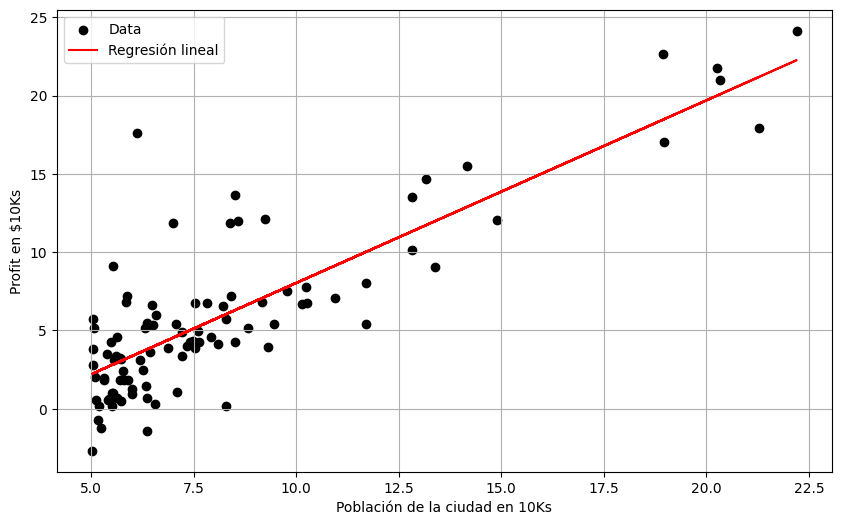

In [16]:
graficaDatos(x[:, 1], y, theta)

* **Gráfica Final:** Finalmente, se grafica nuevamente los datos junto con la recta de regresión obtenida para visualizar el ajuste del modelo.


## Conclusión

En este proyecto, se implementó un modelo de regresión lineal simple utilizando Python. A través del algoritmo de descenso por gradiente, se encontraron los valores óptimos para los parámetros de la recta que mejor ajusta los datos de población y ganancias.

El modelo resultante puede ser utilizado para hacer predicciones sobre las ganancias esperadas en nuevas ciudades basadas en su población. Los resultados obtenidos fueron satisfactorios y demostraron la eficacia del método de regresión lineal simple en este contexto.

**La mejor ubicación para colocar un food truck, según el modelo de regresión lineal simple, sería la ciudad con la mayor población, ya que se espera que esto maximice las ganancias**. Sin embargo, es crucial complementar esta recomendación con un análisis más detallado que incluya factores adicionales relevantes para el negocio.

Para mejorar este proyecto, se podrían explorar métodos de regularización o implementar modelos de regresión más complejos que consideren múltiples variables.


## Referencias

1. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning: with Applications in R*. Springer. https://doi.org/10.1007/978-1-4614-7138-7

2. Freedman, D. A. (2009). *Statistical Models: Theory and Practice* (Revised edition). Cambridge University Press. https://doi.org/10.1017/CBO9780511815867

3. Kutner, M. H., Nachtsheim, C. J., & Neter, J. (2004). *Applied Linear Regression Models* (4th ed.). McGraw-Hill/Irwin.

4. Ng, A. (2011). *Machine Learning*. Coursera-Stanford. https://www.coursera.org/learn/machine-learning
